## Create, Run and Analzye a visual Q/A benchmark

Here is a very basic example of how to create, run and anlyze a benchmark with LMeval.
LMeval offers far more capabilities but that should give you a feel of what it does.

In [1]:
from lmeval import get_scorer, ScorerType, Question, Task, TaskType
from lmeval import Category, Benchmark, QuestionSource
from lmeval.evaluator import Evaluator
from lmeval.prompts import SingleWordAnswerPrompt
from lmeval.models.gemini import GeminiModel
from lmeval import load_benchmark

## benchmark creation

In [2]:
SAVE_PATH = '../tmp/cats.lmarxiv'
# create a benchmark object
benchmark = Benchmark(name='Cat Visual Questions',
                      description='Ask questions about cats picture')

# define category
category = Category(name='cat Q/A')
benchmark.categories.append(category)

# define task
scorer = get_scorer(ScorerType.contain_text_insensitive)
task = Task(name='Eyes color', type=TaskType.text_generation, scorer=scorer)
category.tasks.append(task)

# add questions
source = QuestionSource(name='cookbook')
# cat 1 question - create question then add media image
question = Question(id=0, question='what is the colors of eye?',
                    answer='blue', source=source)
question.add_media('./data/media/cat_blue.jpg')
task.questions.append(question)

# cat 2 question - create question then add media image
question = Question(id=1, question='what is the colors of eye?',
                    answer='green', source=source)
question.add_media('./data/media/cat_green.jpg')
task.questions.append(question)
benchmark.summary()


-=Cat Visual Questions ()=-
Ask questions about cats picture
|-Authors:  ()
|-Version:  - License: 
|-URL: 
|-Questions: 2
|-Answers: 0

[Questions Stats]
               Type             Level      Questions  Images    Audios    Videos      Prompts    Models    Answers    Punts
-------------  ---------------  -------  -----------  --------  --------  --------  ---------  --------  ---------  -------
cat Q/A                                            2                                        0         0          0        0
|- Eyes color  text_generation  basic              2  0         0         0                 0         0          0        0


## Evaluation

In [3]:
# evaluate benchmark on two models
models = [GeminiModel(), GeminiModel(model_version='gemini-1.5-pro')]

prompt = SingleWordAnswerPrompt()
evaluator = Evaluator(benchmark)
eval_plan = evaluator.plan(models, prompt)  # plan evaluation
completed_benchmark = evaluator.execute()  # run evaluation

[Cat Visual Questions evaluation planning report]
|-Models to evaluate: 2
|-Prompts to evaluate: 1
|-Total evaluations to perform: 4


Category    Task        Prompt                  Model                      Planned    Existing    Expected Total
----------  ----------  ----------------------  -----------------------  ---------  ----------  ----------------
cat Q/A     Eyes color  single_word_answer-1.0  gemini-1.5-flash-unsafe          2           0                 2
cat Q/A     Eyes color  single_word_answer-1.0  gemini-1.5-pro-unsafe            2           0                 2


Model gemini-1.5-flash-unsafe:   0%|          | 0/2 [00:00<?, ?it/s]

exec model: gemini-1.5-flash-unsafe, prompts: 2, medias: 1


Model gemini-1.5-pro-unsafe:   0%|          | 0/2 [00:00<?, ?it/s]

exec model: gemini-1.5-pro-unsafe, prompts: 2, medias: 1


# Serialization

In [4]:
# we check the benchmark now have answer
benchmark.summary()
# feel free to save your results
benchmark.save(SAVE_PATH)

-=Cat Visual Questions ()=-
Ask questions about cats picture
|-Authors:  ()
|-Version:  - License: 
|-URL: 
|-Questions: 2
|-Answers: 4

[Questions Stats]
               Type             Level      Questions  Images    Audios    Videos      Prompts    Models    Answers    Punts
-------------  ---------------  -------  -----------  --------  --------  --------  ---------  --------  ---------  -------
cat Q/A                                            2                                        1         1          4        0
|- Eyes color  text_generation  basic              2  0         0         0                 2         4          4        0

[Answers Stats]
Model                      Num Answers    Avg Score    Num Punts
-----------------------  -------------  -----------  -----------
gemini-1.5-flash-unsafe              2            1            0
gemini-1.5-pro-unsafe                2            1            0


Saving medias content in benchmark archive:   0%|          | 0/2 [00:00<?, ?it/s]

Reloading medias content from benchmark archive:   0%|          | 0/2 [00:00<?, ?it/s]

## basic analysis

You can export the benchmark to a pandas frame and from there slice and dice 
results however you like.

In [5]:
df = benchmark.to_dataframe()
df.head()

,qid,category,task,task_type,question,num_steps,prompt,model,score,punting,total_time,total_cost,total_tokens,completion_tokens,prompt_tokens
0,0,cat Q/A,Eyes color,text_generation,what is the colors of eye?,1,single_word_answer-1.0,gemini-1.5-flash-unsafe,1.0,0,1.295860,0.000022,286,1,285
1,0,cat Q/A,Eyes color,text_generation,what is the colors of eye?,1,single_word_answer-1.0,gemini-1.5-pro-unsafe,1.0,0,1.612879,0.001008,286,1,285
2,1,cat Q/A,Eyes color,text_generation,what is the colors of eye?,1,single_word_answer-1.0,gemini-1.5-flash-unsafe,1.0,0,1.296896,0.000022,286,1,285
3,1,cat Q/A,Eyes color,text_generation,what is the colors of eye?,1,single_word_answer-1.0,gemini-1.5-pro-unsafe,1.0,0,1.613700,0.001008,286,1,285


<Axes: xlabel='model'>

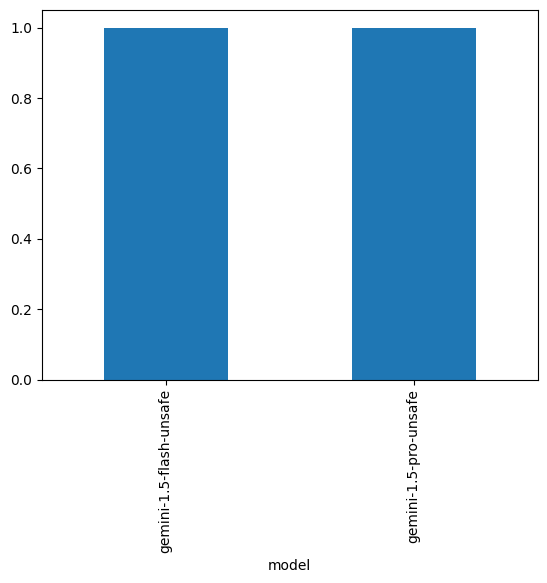

In [6]:
df.groupby('model')['score'].mean().plot(kind='bar')